<div style="border-radius:10px;
            border:#0b0265 solid;
           background-color:green;
           font-size:110%;
           letter-spacing:0.5px;
            text-align: center">

<center><h3 style="padding: 25px 0px; color:white; font-weight: bold; font-family: Cursive">
Customer Segmentation for Marketing analysis 🛍️🛒</h3></center>    

</div>

<img src="https://www.segmentify.com/wp-content/uploads/2021/08/Top-Customer-Segmentation-Examples-every-Marketer-Needs-to-Know.png" style='border-radius:30px'>

<center>
    <div style="border-radius: 10px;
                border: #0b0265 solid;
                background-color: #85e0e0;
                padding: 20px;">
        <h2 style="color: #0b0265; font-weight: bold; font-family: Arial, sans-serif; margin-bottom: 10px;">
            Problem Statement
        </h2>
        <center>
            <p style="font-size: 16px; line-height: 1.5;">
                Customer personality analysis involves a comprehensive examination of a company's ideal clientele. This process enhances a business's comprehension of its customers and facilitates adjustments to products in accordance with the distinct requirements, behaviors, and concerns exhibited by various customer categories.
            </p>
        </center>
        <center>
            <p style="font-size: 16px; line-height: 1.5;">
                This type of analysis empowers businesses to tailor their products to suit the preferences of specific customer segments. For instance, instead of investing resources in promoting a new product to every customer within the company's database, the company can identify the customer segment most likely to purchase the product. Consequently, the business can concentrate its marketing efforts solely on that particular segment.
            </p>
        </center>
    </div>
</center>


## <a name='Dataset_Features'></a>

<div style="border-radius:10px;
            background-color:green;
            letter-spacing:0.5px;
            border-style: solid;
            border-color: #0b0265;
            ">
<center>
<h2 style="padding: 5px 0px; color:white; font-weight: bold; font-family: Cursive">
1. Data Description</h2>
<center>
</div>

**People:**

* `ID`: Customer's unique identifier
* `Year_Birth`: Customer's birth year
* `Education`: Customer's education level
* `Marital_Status`: Customer's marital status
* `Income`: Customer's yearly household income
* `Kidhome`: Number of children in customer's household
* `Teenhome`: Number of teenagers in customer's household
* `Dt_Customer`: Date of customer's enrollment with the company
* `Recency`: Number of days since customer's last purchase
* `Complain`: 1 if the customer complained in the last 2 years, 0 otherwise

**Products:**

* `MntWines`: Amount spent on wine in last 2 years
* `MntFruits`: Amount spent on fruits in last 2 years
* `MntMeatProducts`: Amount spent on meat in last 2 years
* `MntFishProducts`: Amount spent on fish in last 2 years
* `MntSweetProducts`: Amount spent on sweets in last 2 years
* `MntGoldProds`: Amount spent on gold in last 2 years

**Promotion:**

* `NumDealsPurchases`: Number of purchases made with a discount
* `AcceptedCmp1`: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* `AcceptedCmp2`: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* `AcceptedCmp3`: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* `AcceptedCmp4`: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* `AcceptedCmp5`: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* `Response`: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place:**

* `NumWebPurchases`: Number of purchases made through the company’s website
* `NumCatalogPurchases`: Number of purchases made using a catalogue
* `NumStorePurchases`: Number of purchases made directly in stores
* `NumWebVisitsMonth`: Number of visits to company’s website in the last month

# <a name='Import_Libraries_and_Data'></a>

<div style="border-radius:10px;
            background-color:green;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h2 style="padding: 5px 0px; color:white; font-weight: bold; font-family: Cursive">
2. Import Libraries and Data</h2></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/markettingdata/marketing_data.csv


In [3]:
# handle table-like data and matrices
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# preprocessing
from sklearn.preprocessing import StandardScaler

# pca
from sklearn.decomposition import PCA

# clustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import DBSCAN

# evaluations
from sklearn.metrics import confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<center>
    <div style="border-radius: 10px;
                border: #0b0265 solid;
                background-color: #85e0e0;
                padding: 20px;">
        <h2 style="color: #0b0265; font-weight: bold; font-family: Arial, sans-serif; margin-bottom: 10px;">
            Main Objectives
        </h2>
        <center>
            <p style="font-size: 16px; line-height: 1.5;">
               The primary objectives of this clustering analysis are to explore relationships between various features within the dataset, segment customers based on income and spending patterns, understand income-spending dynamics, tailor marketing strategies, identify high-value customer segments, visualize insights effectively, and mitigate potential financial risks. By leveraging clustering techniques, this analysis aims to provide actionable insights that guide decision-making processes and enhance customer-centric strategies for the business
            </p>
        </center>
    </div>
</center>


In [4]:
def wrangle(path):
    return pd.read_csv(path)

In [5]:
path = '/kaggle/input/markettingdata/marketing_data.csv'
df = wrangle(path)

# <a name='Data Exploration'></a>

<div style="border-radius:10px;
            background-color:green;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h2 style="padding: 5px 0px; color:white; font-weight: bold; font-family: Cursive">
3. Data Exploration</h2></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [6]:
df.head()

ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0         0     6/16/14        0       189        104              379   
1         0     6/15/14        0       464          5               64   
2         1     5/13/14        0       134         11               59   
3         1     5/11/14        0        10          0                1   
4         0      4/8/14        0         6         16               24   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              111               189           218                  1   
1                7                 0            37                  1   
2               15                 2            30                  1   
3                0                 0             0                  1   
4               11                 0            34                  2   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                4                    4                  6                  1   
1                7                    3                  7                  5   
2                3                    2                  5                  2   
3                1                    0                  2                  7   
4                3                    1                  2                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             1             0             0             0             0   

   Response  Complain Country  
0         1         0      SP  
1         1         0      CA  
2         0         0      US  
3         0         0     AUS  
4         1         0      SP

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

- **We see that Income column has some missing values**

In [8]:
df.describe().T

count         mean          std     min      25%  \
ID                   2240.0  5592.159821  3246.662198     0.0  2828.25   
Year_Birth           2240.0  1968.805804    11.984069  1893.0  1959.00   
Kidhome              2240.0     0.444196     0.538398     0.0     0.00   
Teenhome             2240.0     0.506250     0.544538     0.0     0.00   
Recency              2240.0    49.109375    28.962453     0.0    24.00   
MntWines             2240.0   303.935714   336.597393     0.0    23.75   
MntFruits            2240.0    26.302232    39.773434     0.0     1.00   
MntMeatProducts      2240.0   166.950000   225.715373     0.0    16.00   
MntFishProducts      2240.0    37.525446    54.628979     0.0     3.00   
MntSweetProducts     2240.0    27.062946    41.280498     0.0     1.00   
MntGoldProds         2240.0    44.021875    52.167439     0.0     9.00   
NumDealsPurchases    2240.0     2.325000     1.932238     0.0     1.00   
NumWebPurchases      2240.0     4.084821     2.778714     0.0     2.00   
NumCatalogPurchases  2240.0     2.662054     2.923101     0.0     0.00   
NumStorePurchases    2240.0     5.790179     3.250958     0.0     3.00   
NumWebVisitsMonth    2240.0     5.316518     2.426645     0.0     3.00   
AcceptedCmp3         2240.0     0.072768     0.259813     0.0     0.00   
AcceptedCmp4         2240.0     0.074554     0.262728     0.0     0.00   
AcceptedCmp5         2240.0     0.072768     0.259813     0.0     0.00   
AcceptedCmp1         2240.0     0.064286     0.245316     0.0     0.00   
AcceptedCmp2         2240.0     0.013393     0.114976     0.0     0.00   
Response             2240.0     0.149107     0.356274     0.0     0.00   
Complain             2240.0     0.009375     0.096391     0.0     0.00   

                        50%      75%      max  
ID                   5458.5  8427.75  11191.0  
Year_Birth           1970.0  1977.00   1996.0  
Kidhome                 0.0     1.00      2.0  
Teenhome                0.0     1.00      2.0  
Recency                49.0    74.00     99.0  
MntWines              173.5   504.25   1493.0  
MntFruits               8.0    33.00    199.0  
MntMeatProducts        67.0   232.00   1725.0  
MntFishProducts        12.0    50.00    259.0  
MntSweetProducts        8.0    33.00    263.0  
MntGoldProds           24.0    56.00    362.0  
NumDealsPurchases       2.0     3.00     15.0  
NumWebPurchases         4.0     6.00     27.0  
NumCatalogPurchases     2.0     4.00     28.0  
NumStorePurchases       5.0     8.00     13.0  
NumWebVisitsMonth       6.0     7.00     20.0  
AcceptedCmp3            0.0     0.00      1.0  
AcceptedCmp4            0.0     0.00      1.0  
AcceptedCmp5            0.0     0.00      1.0  
AcceptedCmp1            0.0     0.00      1.0  
AcceptedCmp2            0.0     0.00      1.0  
Response                0.0     0.00      1.0  
Complain                0.0     0.00      1.0

In [9]:
df.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

- **From the above description, we can confirm that there are some outliers in our Series**

# <a name='Data Preprocessing'></a>

<div style="border-radius:10px;
            background-color:green;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h2 style="padding: 5px 0px; color:white; font-weight: bold; font-family: Cursive">
4. Data Preprocessing</h2></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [10]:
# Clean the column name ' Income ' by removing leading and trailing spaces
df.rename(columns=lambda x: x.strip(), inplace=True)

# Count missing values in the 'Income' column
missing_values_count = df['Income'].isnull().sum()
print("Total missing values in Income column:", missing_values_count)

Total missing values in Income column: 24


In [11]:
# Drop rows with missing values in the cleaned column
df.dropna(subset = 'Income', inplace=True)
assert(df['Income'].isnull().sum()==0,"Successfully removed missing values", "Failed to remove missing values")

# Assert that there are no missing values in the 'Income' column
assert df['Income'].isnull().sum() == 0, "Failed to remove missing values in 'Income' column"
print("Successfully removed missing values from 'Income' column")

Successfully removed missing values from 'Income' column


In [12]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

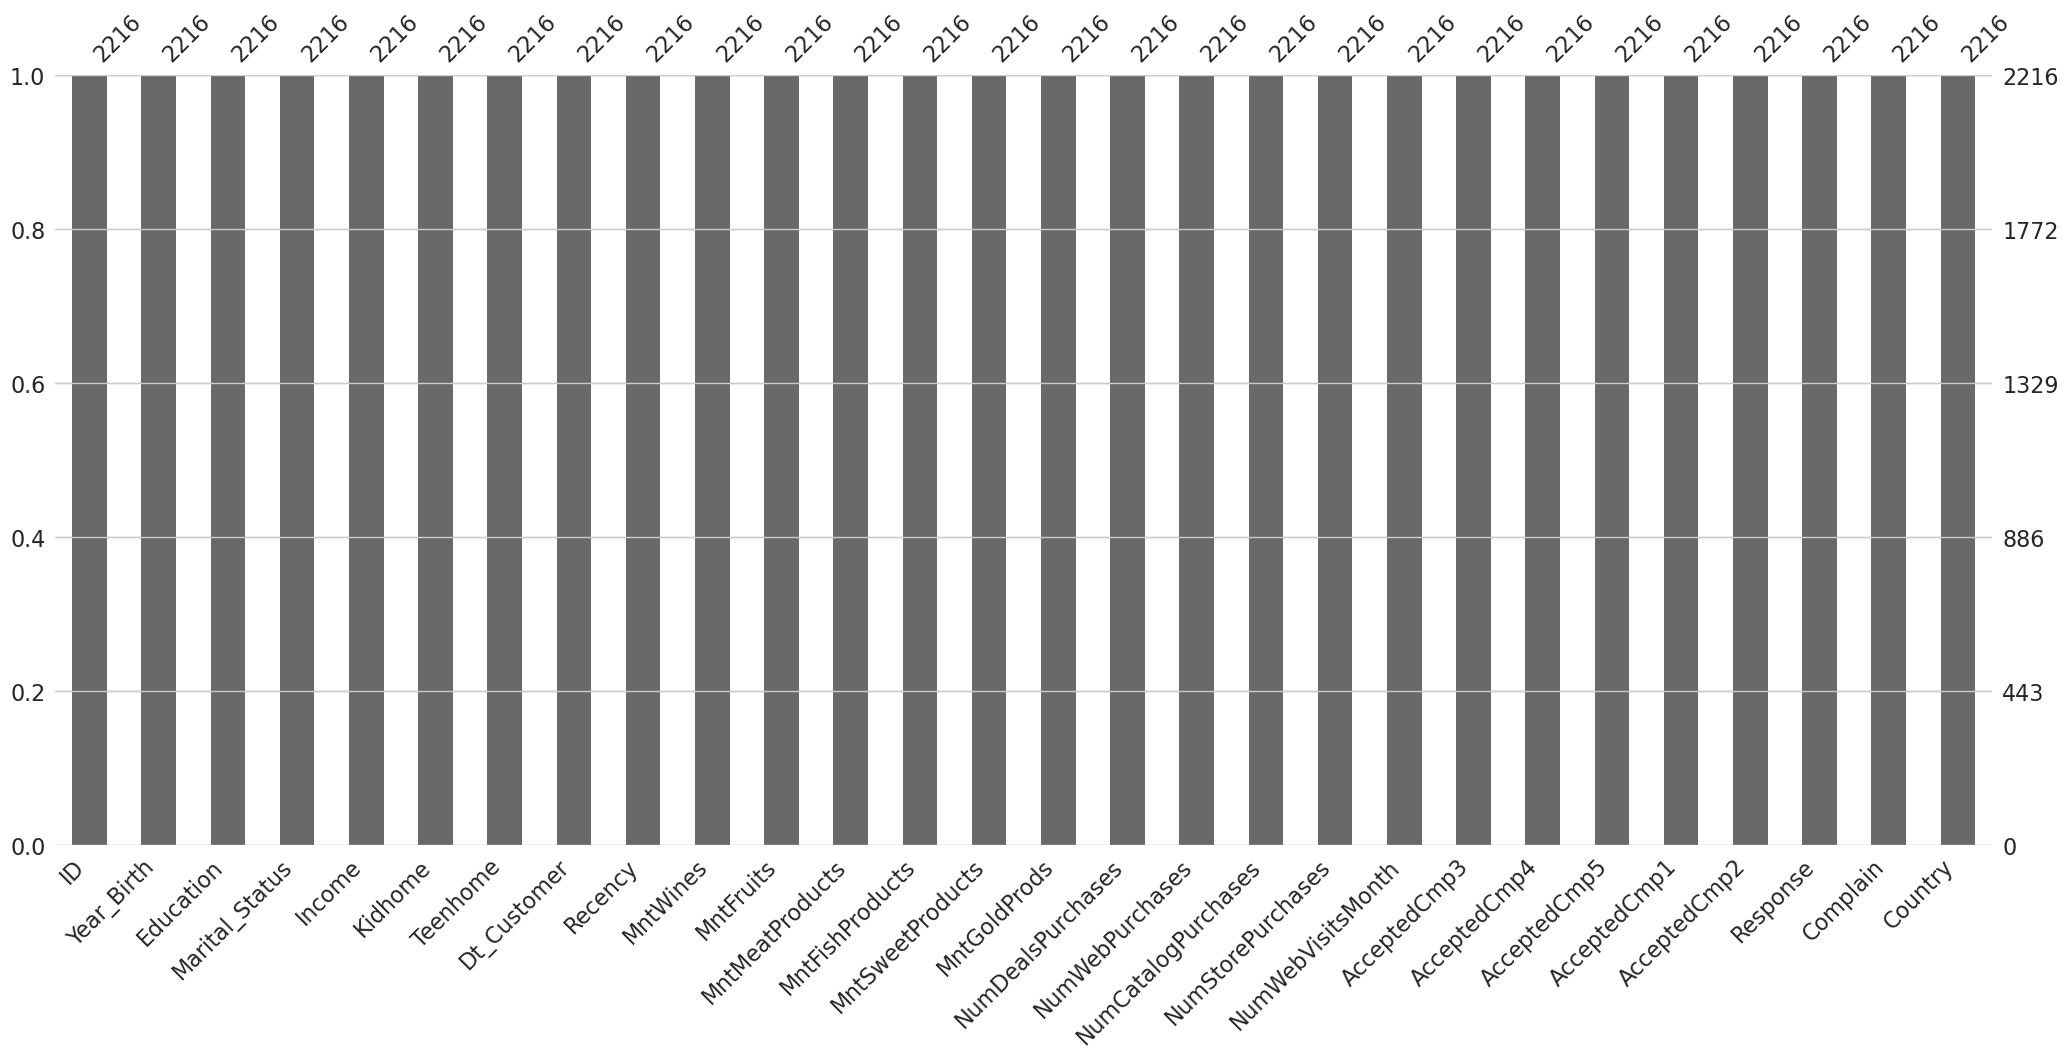

In [13]:
msno.bar(df);

- **Here y axis ranges from 0 to 1, 1 means there is no missing values and 0 means all the data are missing.** 
-**So, if data ranges between 0 to 1 tells that the missing values are present in the dataset**
- **In our case,We can see that there is no Missing data anymore.**

In [14]:
# Checking the number of duplicate values
print("Number of Duplicate values :",df.duplicated().sum())

Number of Duplicate values : 0


In [15]:
df.describe(include='object').T

count unique         top  freq
Education       2216      5  Graduation  1116
Marital_Status  2216      8     Married   857
Income          2216   1974  $7,500.00     12
Dt_Customer     2216    662     8/31/12    12
Country         2216      8          SP  1093

- **Here We can see, Income contains the numeric data, but because of dollar($) sign, it is treated as object, so lets preprocess it**

In [16]:
df['income_in_usd'] = df['Income'].str.replace(',','').str.replace('$','').astype(float)

- **Now, we have customer's Income in proper format as income_in_usd. So, the previous Income feature is redundant and not useful anymore. This is good idea to drop it**

In [17]:
#droping redundant features
df.drop(columns='Income',inplace=True)

## Checking % cover by each categorical labels
 This is important because Rare values or labels in categorical variables can lead to overfitting in machine learning models, as they might not have sufficient representation in either the training or test set, causing instability in predictions

In [18]:
categorical = [var for var in df.columns if df[var].dtype=='O']
     
# check the number of different labels
for var in categorical:
    print(f"Columns Name : {var}")
    print()
    print(df[var].value_counts() / np.float(len(df)))
    print()

Columns Name : Education

Graduation    0.503610
PhD           0.217058
Master        0.164711
2n Cycle      0.090253
Basic         0.024368
Name: Education, dtype: float64

Columns Name : Marital_Status

Married     0.386733
Together    0.258574
Single      0.212545
Divorced    0.104693
Widow       0.034296
Alone       0.001354
YOLO        0.000903
Absurd      0.000903
Name: Marital_Status, dtype: float64

Columns Name : Dt_Customer

8/31/12    0.005415
2/14/13    0.004964
5/12/14    0.004964
9/12/12    0.004964
8/20/13    0.004513
             ...   
1/9/14     0.000451
9/5/12     0.000451
11/9/13    0.000451
7/20/13    0.000451
9/1/12     0.000451
Name: Dt_Customer, Length: 662, dtype: float64

Columns Name : Country

SP     0.493231
SA     0.152076
CA     0.120036
AUS    0.066336
IND    0.066336
GER    0.052347
US     0.048285
ME     0.001354
Name: Country, dtype: float64



# <a name='Feature Engineering'></a>

<div style="border-radius:10px;
            background-color:green;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h2 style="padding: 5px 0px; color:white; font-weight: bold; font-family: Cursive">
5. Feature Engineering</h2></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [19]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'income_in_usd'],
      dtype='object')

In [20]:
#check the datatypes of date column
df['Dt_Customer'].dtypes

dtype('O')

**There can be Parsing issue as'Dt_Customer'column which should Recognized as DateTime is now in Object format. <BR> So lets typecast it into correct format**

In [21]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [22]:
print("The newest customer's enrolment date in the records:", max(df['Dt_Customer']))
print("The oldest customer's enrolment date in the records:", min(df['Dt_Customer']))

The newest customer's enrolment date in the records: 2014-06-29 00:00:00
The oldest customer's enrolment date in the records: 2012-07-30 00:00:00


**Since we have date of birth of each customer, we can get the respective age by reducing their dob by current year. for example, if customer A is born on 2000 and the current running year is 2020, The Age of that individual is 2020 - 2000 = 20 years.<br> As we have the record from 2012 to 2014, we will consider the age of customer by 2015.**

In [23]:
# As we have the record from 2012 to 2014, we will consider the age of customer by 2015.
df['Age'] = 2015 - df['Year_Birth']

**let's assume that we want to focus on of Veg/Vegan Product only. So let's drop unnecessary features**

In [24]:
df.drop(columns=['MntMeatProducts','MntFishProducts'], inplace=True)

**Creating an additional attribute named "total_spent" that represents the overall expenditure made by the customer across different categories during the course of two years.**

In [25]:
df['total_spent'] = df['MntWines'] + df['MntFruits'] + df['MntSweetProducts'] + df['MntGoldProds']

**Create another feature "Living_With" out of "Marital_Status" to extract the living situation of Customer.**

In [26]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [27]:
df['Living_With'] = df['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'})

**Recall That :**
- Kidhome: Number of children in customer's household 
- Teenhome: Number of teenagers in customer's household 

**So,Lets Create a feature "Children" to indicate total children in a household**

In [28]:
df['Children'] = df['Kidhome'] + df['Teenhome']

**To gain a better insight into the structure of the household, it's recommended to create a new feature that reflects the "Family_Size."**

In [29]:
df['Family_Size'] = df['Living_With'].replace({'Alone': 1, 'Partner':2}) + df['Children']

**An additional idea is to incorporate a feature named "Is_Parent," which would serve the purpose of indicating whether someone is a parent or not.**

In [30]:
df['Is_Parent'] = np.where(df.Children > 0, 1, 0)

**Grouping education levels in three categories**

In [31]:
df['Education'] = df['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

**Creating new column `accepted_promotion` to store the number of promotion campaign accepted by customer**

In [32]:
df['accepted_promotion'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [33]:
df.head()

ID  Year_Birth Education Marital_Status  Kidhome  Teenhome Dt_Customer  \
0   1826        1970  Graduate       Divorced        0         0  2014-06-16   
1      1        1961  Graduate         Single        0         0  2014-06-15   
2  10476        1958  Graduate        Married        0         1  2014-05-13   
3   1386        1967  Graduate       Together        1         1  2014-05-11   
4   5371        1989  Graduate         Single        1         0  2014-04-08   

   Recency  MntWines  MntFruits  MntSweetProducts  MntGoldProds  \
0        0       189        104               189           218   
1        0       464          5                 0            37   
2        0       134         11                 2            30   
3        0        10          0                 0             0   
4        0         6         16                 0            34   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  1                4                    4                  6   
1                  1                7                    3                  7   
2                  1                3                    2                  5   
3                  1                1                    0                  2   
4                  2                3                    1                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0             0             0   
1                  5             0             0             0             0   
2                  2             0             0             0             0   
3                  7             0             0             0             0   
4                  7             1             0             0             0   

   AcceptedCmp2  Response  Complain Country  income_in_usd  Age  total_spent  \
0             0         1         0      SP        84835.0   45          700   
1             1         1         0      CA        57091.0   54          506   
2             0         0         0      US        67267.0   57          177   
3             0         0         0     AUS        32474.0   48           10   
4             0         1         0      SP        21474.0   26           56   

  Living_With  Children  Family_Size  Is_Parent  accepted_promotion  
0       Alone         0            1          0                   0  
1       Alone         0            1          0                   1  
2     Partner         1            3          1                   0  
3     Partner         2            4          1                   0  
4       Alone         1            2          1                   1

**Droping Redundant Features**
- We made a new column using information we already had. This means some of the old columns are no longer needed, so we can get rid of them now. However, we will still keep some column as it can be useful for segmentation

In [34]:
col = (['Marital_Status','Dt_Customer','Year_Birth',
        'ID','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3',
       'AcceptedCmp4','AcceptedCmp5','Kidhome','Teenhome'])
df.drop(columns=col,inplace=True)

In [35]:
df.tail()

Education  Recency  MntWines  MntFruits  MntSweetProducts  \
2235   Postgraduate       99       372         18                48   
2236  Undergraduate       99         5         10                 8   
2237       Graduate       99       185          2                 5   
2238       Graduate       99       267         38               165   
2239   Postgraduate       99       169         24                 0   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
2235            78                  2                5                    2   
2236            16                  1                1                    0   
2237            14                  2                6                    1   
2238            63                  1                5                    4   
2239           144                  1                8                    5   

      NumStorePurchases  NumWebVisitsMonth  Response  Complain Country  \
2235                 11                  4         0         0      US   
2236                  3                  8         0         0      SP   
2237                  5                  8         0         0      SP   
2238                 10                  3         0         0     IND   
2239                  4                  7         1         0      CA   

      income_in_usd  Age  total_spent Living_With  Children  Family_Size  \
2235        66476.0   39          516       Alone         1            2   
2236        31056.0   38           39     Partner         1            3   
2237        46310.0   39          206       Alone         1            2   
2238        65819.0   37          533     Partner         0            2   
2239        94871.0   46          337     Partner         2            4   

      Is_Parent  accepted_promotion  
2235          1                   0  
2236          1                   0  
2237          1                   0  
2238          0                   0  
2239          1                   2

**We can see that, the four feature has been successfully removed**

# <a name='Outlier Detection'></a>

<div style="border-radius:10px;
            background-color:green;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h2 style="padding: 5px 0px; color:white; font-weight: bold; font-family: Cursive">
6. Outlier Detection</h2></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

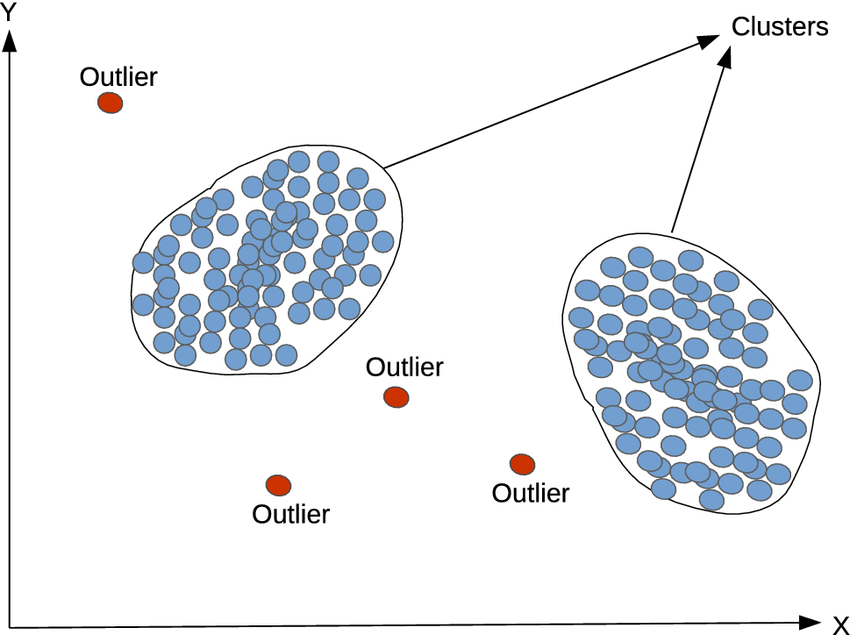

### Column : income_in_usd

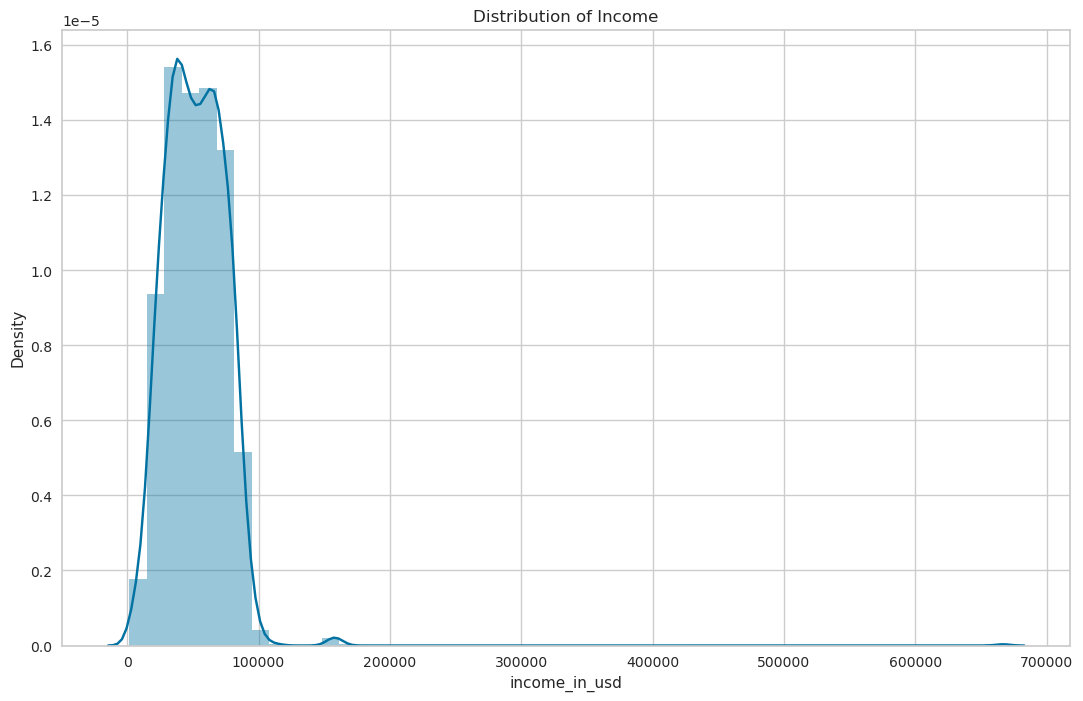

In [36]:
#lets visualize the distribution
plt.figure(figsize=(13,8))
sns.distplot(df.income_in_usd);
plt.title("Distribution of Income");

**We can se small peak going from 150,000 to 700,000. This shows the sign of rare/outlier values. And as the distribution of data is  skewed towards right, we will be using trimming techniques instead of capping for handling outliers**

In [37]:
higher_quantile_income = df['income_in_usd'].quantile(0.95)
lower_quantile_income = df['income_in_usd'].quantile(0.05)
print(f"Higher Quantile is {higher_quantile_income}")
print(f"Lower Quantile is {lower_quantile_income}")
print(f"There are {(df['income_in_usd'] > higher_quantile_income).sum()} data above higher quantile")
print(f"There are {(df['income_in_usd'] < lower_quantile_income).sum()} data less than lower quantile")

Higher Quantile is 84130.0
Lower Quantile is 18985.5
There are 111 data above higher quantile
There are 111 data less than lower quantile


In [38]:
#creating a mask of trimmed income
mask = (df['income_in_usd'] <= higher_quantile_income) & (df['income_in_usd'] >= lower_quantile_income)
df = df[mask]
print(f"Maximum value after capping: {df['income_in_usd'].max()}")
print(f"Minimum value after capping: {df['income_in_usd'].min()}")

Maximum value after capping: 84117.0
Minimum value after capping: 18988.0


### Column : total_spent

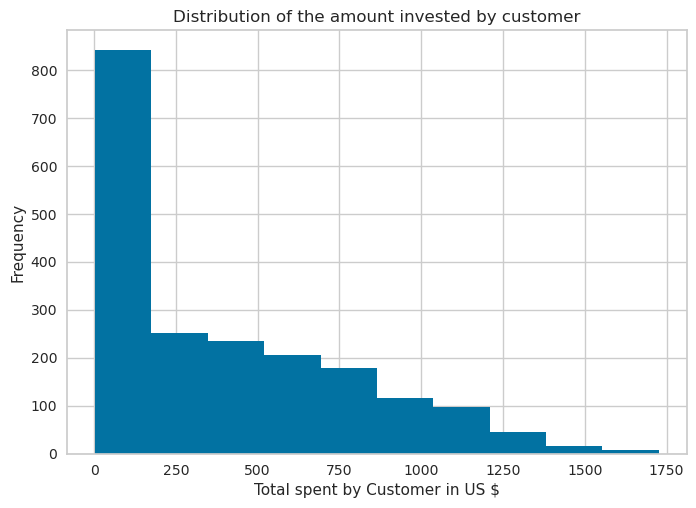

In [39]:
#plotting histogram of total_spent of customer
plt.hist(df['total_spent'])
plt.xlabel("Total spent by Customer in US $")
plt.ylabel("Frequency");
plt.title("Distribution of the amount invested by customer");

**As the distribution is highly left skewed, lets analyze it and perform trimming**

In [40]:
higher_quantile_total_spent = df['total_spent'].quantile(0.95)
lower_quantile_total_spent = df['total_spent'].quantile(0.05)
print(f"Higher Quantile is {higher_quantile_total_spent}")
print(f"Lower Quantile is {lower_quantile_total_spent}")
print()
print(f"There are {(df['total_spent'] > higher_quantile_total_spent).sum()} data above higher quantile")
print(f"There are {(df['total_spent'] < lower_quantile_total_spent).sum()} data less than lower quantile")

#lets trim/remove th outside quantile data
updated_df = df[(df['total_spent'] >= lower_quantile_total_spent) & (df['total_spent'] <= higher_quantile_total_spent)]

print(f"Maximum spending value after triming: {updated_df['total_spent'].max()}")
print(f"Minimum spending value after triming: {updated_df['total_spent'].min()}")

Higher Quantile is 1145.0
Lower Quantile is 15.0

There are 99 data above higher quantile
There are 94 data less than lower quantile
Maximum spending value after triming: 1145
Minimum spending value after triming: 15


### Comparing Shape of updated dataframe with previous

In [41]:
print("Shape before updated {}, Shape after updated {}".format(df.shape, updated_df.shape))

Shape before updated (1994, 22), Shape after updated (1801, 22)


### Column : Age

In [42]:
updated_df["Age"].min(),updated_df['Age'].max()

(20, 115)

**We can see that minimum age is Okey, but Maximum age is too far that normal customer can have. So, in this senario IQR methods seems better option which we see in next steps**
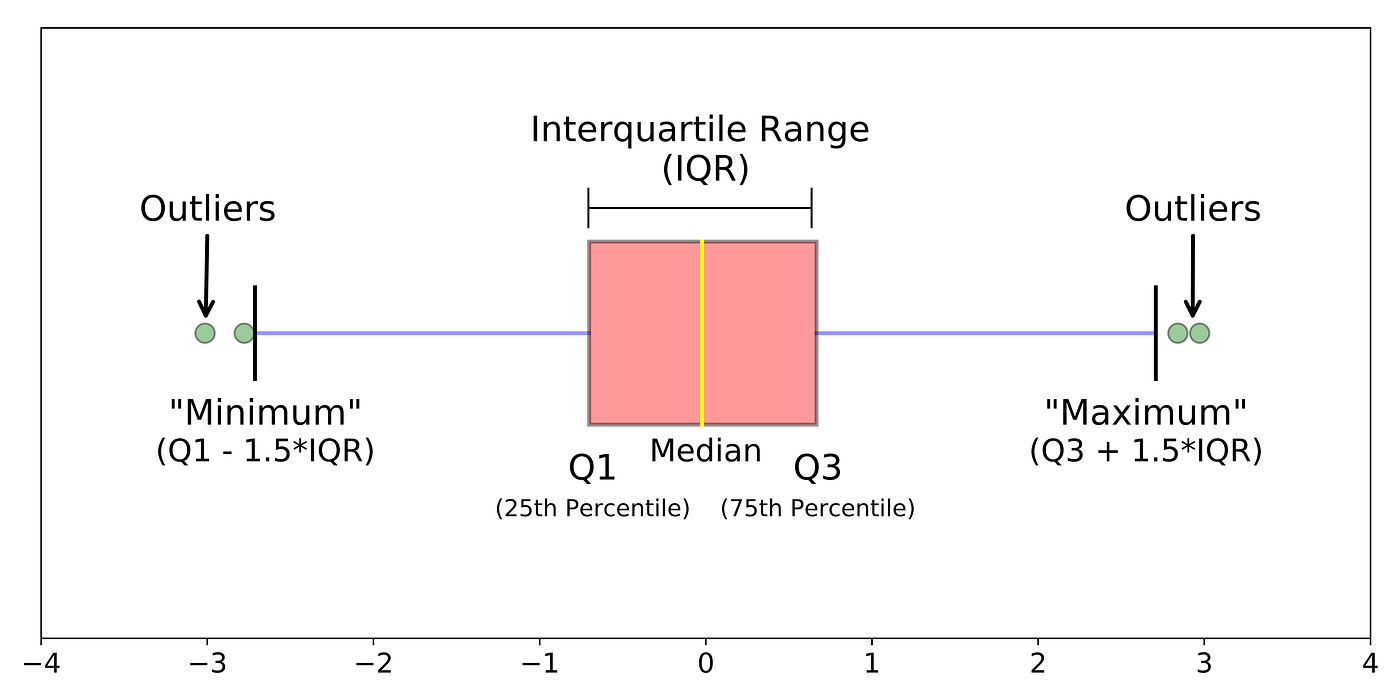

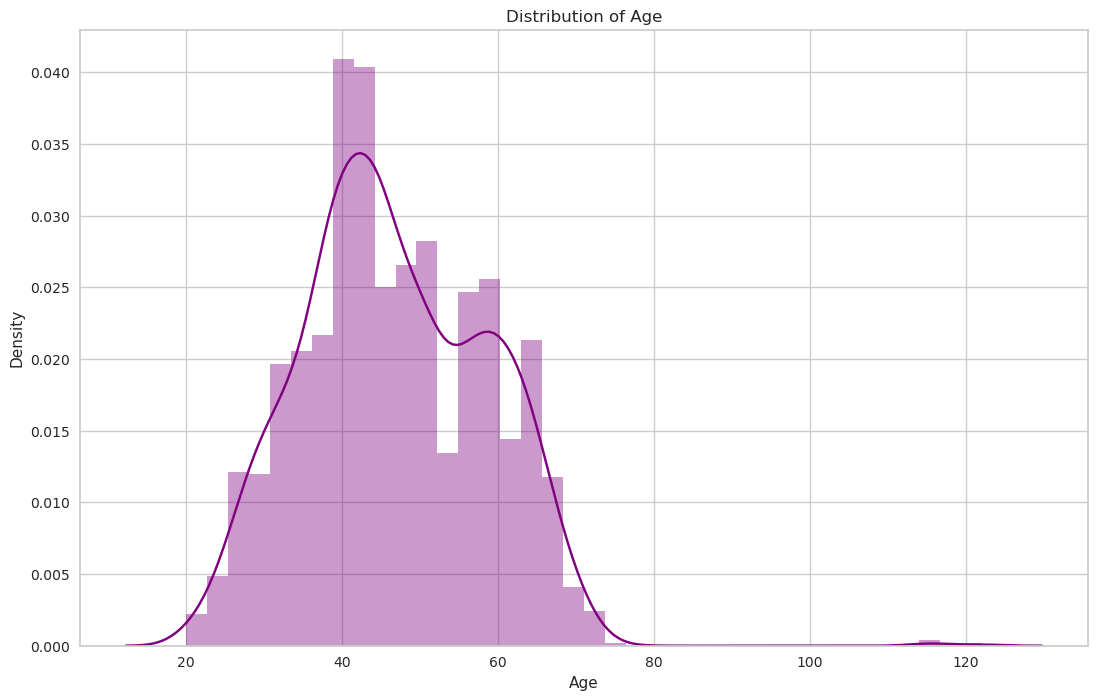

In [43]:
#lets visualize the distribution
plt.figure(figsize=(13,8))
sns.distplot(df.Age,color='purple');
plt.title("Distribution of Age");

In [44]:
# Calculate the interquartile range (IQR)
Q1 = updated_df['Age'].quantile(0.25)
Q3 = updated_df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"lower_bound :{lower_bound}, upper_bound :{upper_bound}")
print()

# Identify and print the number of outliers
outliers_below = (updated_df['Age'] < lower_bound).sum()
outliers_above = (updated_df['Age'] > upper_bound).sum()
print(f"Number of outliers below the lower bound: {outliers_below}")
print(f"Number of outliers above the upper bound: {outliers_above}")

updated_df[(updated_df['Age']>=upper_bound) | (updated_df['Age']<=lower_bound)]

lower_bound :13.5, upper_bound :81.5

Number of outliers below the lower bound: 0
Number of outliers above the upper bound: 1


Education  Recency  MntWines  MntFruits  MntSweetProducts  \
2233  Undergraduate       99        15          6                 4   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
2233            25                  1                2                    1   

      NumStorePurchases  NumWebVisitsMonth  Response  Complain Country  \
2233                  2                  5         0         1     IND   

      income_in_usd  Age  total_spent Living_With  Children  Family_Size  \
2233        36640.0  115           50       Alone         1            2   

      Is_Parent  accepted_promotion  
2233          1                   0

**We can see there is only one data to be removed**

In [45]:
# # Remove outliers using IQR technique
updated_df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

# Print the maximum and minimum age values after outlier removal
print(f"Maximum age value after outlier removal: {updated_df['Age'].max()}")
print(f"Minimum age value after outlier removal: {updated_df['Age'].min()}")

Maximum age value after outlier removal: 75
Minimum age value after outlier removal: 20


### Visualizing through boxplot after handling outliers

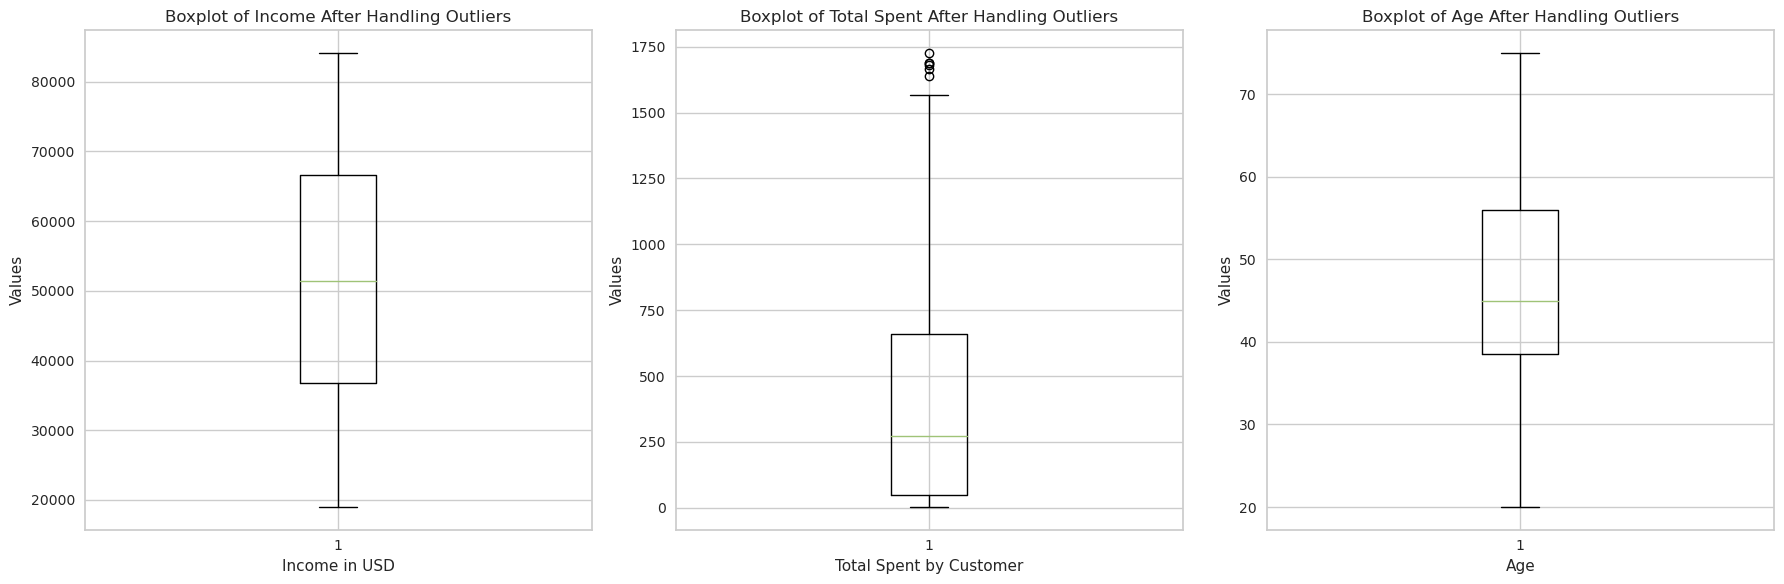

In [46]:
# Create boxplots for all three columns
plt.figure(figsize=(18, 6))

# Boxplot for 'income_in_usd'
plt.subplot(1, 3, 1)
plt.boxplot(updated_df['income_in_usd'])
plt.xlabel("Income in USD")
plt.ylabel("Values")
plt.title("Boxplot of Income After Handling Outliers")

# Boxplot for 'total_spent'
plt.subplot(1, 3, 2)
plt.boxplot(updated_df['total_spent'])
plt.xlabel("Total Spent by Customer")
plt.ylabel("Values")
plt.title("Boxplot of Total Spent After Handling Outliers")

# Boxplot for 'Age'
plt.subplot(1, 3, 3)
plt.boxplot(updated_df['Age'])
plt.xlabel("Age")
plt.ylabel("Values")
plt.title("Boxplot of Age After Handling Outliers")

plt.tight_layout()
plt.show()

# <a name='Data Exploration and Visualization'></a>

<div style="border-radius:10px;
            background-color:green;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h2 style="padding: 5px 0px; color:white; font-weight: bold; font-family: Cursive">
7. Data Exploration and Visualization</h2></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

**Let's check the most spending customer by Country**

In [47]:
# plotting the pie chart
fig = px.pie(
    updated_df,
    values = 'total_spent',
    names = 'Country',
    title = 'Total Spent by Country',
    color_discrete_sequence = px.colors.sequential.Magma
)

fig.show()

After analyzing the pie chart depicting the distribution of total spending by country label, several key insights emerge. Spain emerges as the dominant contributor, accounting for a significant portion of the spending at 49%. Following behind, South Africa constitutes 15.7% of the total expenditure, while Australia contributes 12.7%. India and Germany also play noteworthy roles, with contributions of 6.36% and 5.78%, respectively. The United States and Mexico, although smaller in comparison, still hold significance, representing 5.02% and 0.232% of the total spend, respectively. These insights shed light on the distribution of expenditures across various countries, allowing for informed decision-making and strategic planning.

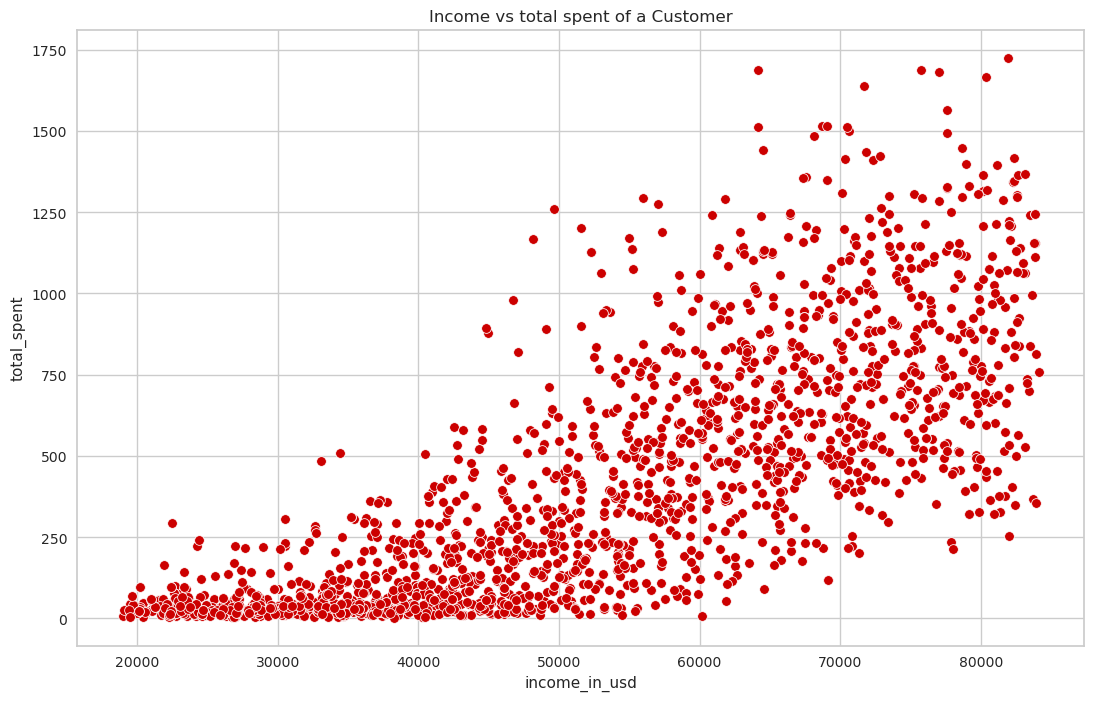

In [48]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=updated_df['income_in_usd'], y=updated_df['total_spent'], color='#cc0000')
plt.title("Income vs total spent of a Customer");

**We can see a positive linear relationship of income and expenditure of a customer**

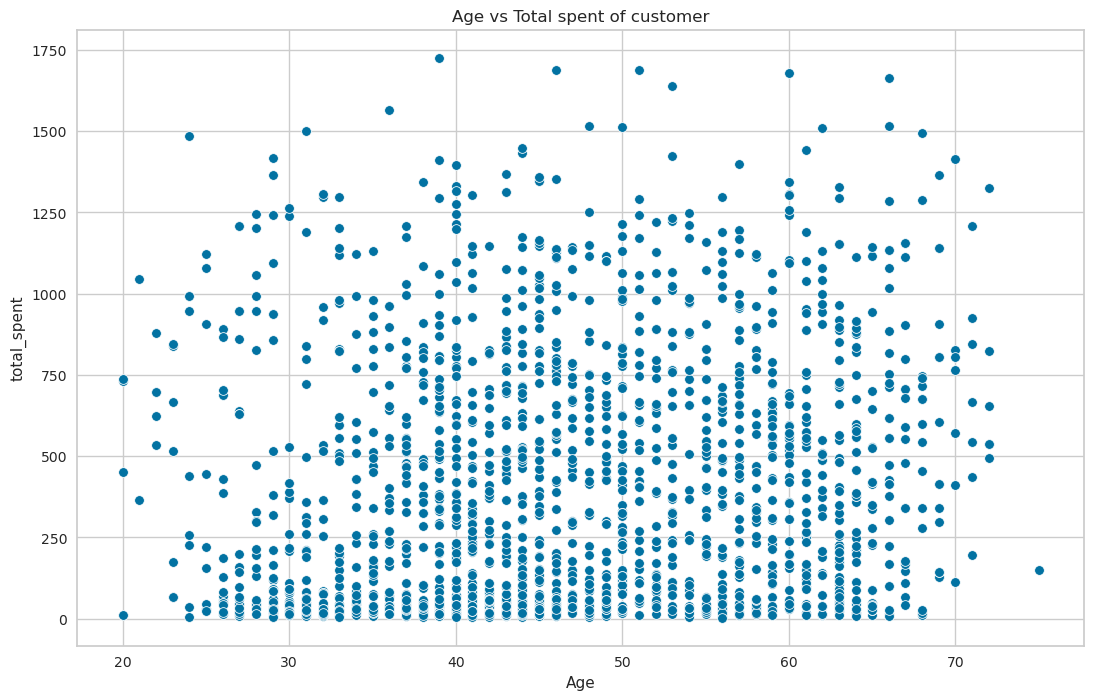

In [49]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=updated_df['Age'], y=updated_df['total_spent'])
plt.title("Age vs Total spent of customer");

In [50]:
fig = px.scatter(updated_df,
                 x='Education', 
                 y='total_spent',
                 color='Education',
                 title='Relationship between Education and Total Spent',
                 labels={'education': 'Education', 'total_spent': 'Total Spent'})

# Show the plot
fig.show()

**We can conclude, more the person is educationally qualified, more he/she spends**

In [51]:
# Count the occurrences of each education level
education_counts = updated_df['Education'].value_counts()

# Create a pie chart using Plotly
fig = px.pie(
        education_counts,
        names=education_counts.index,
        values=education_counts.values,
        title='Distribution of Education Levels',
    )

# Show the pie chart
fig.show()

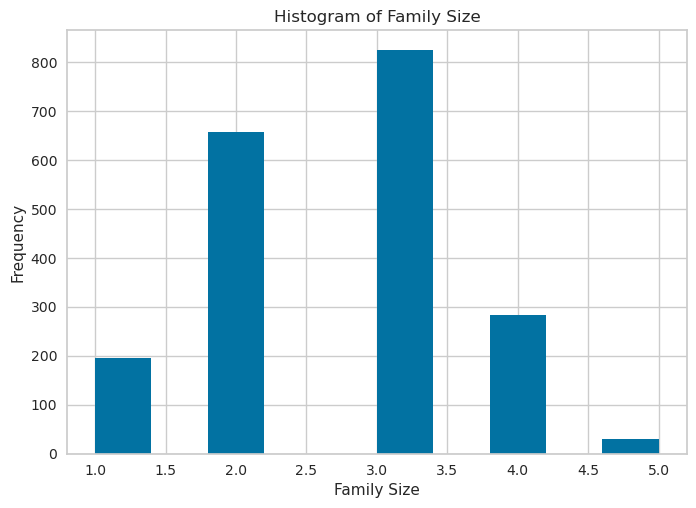

In [52]:
updated_df['Family_Size'].plot(
    kind='hist',
    title='Histogram of Family Size'
)
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.show()

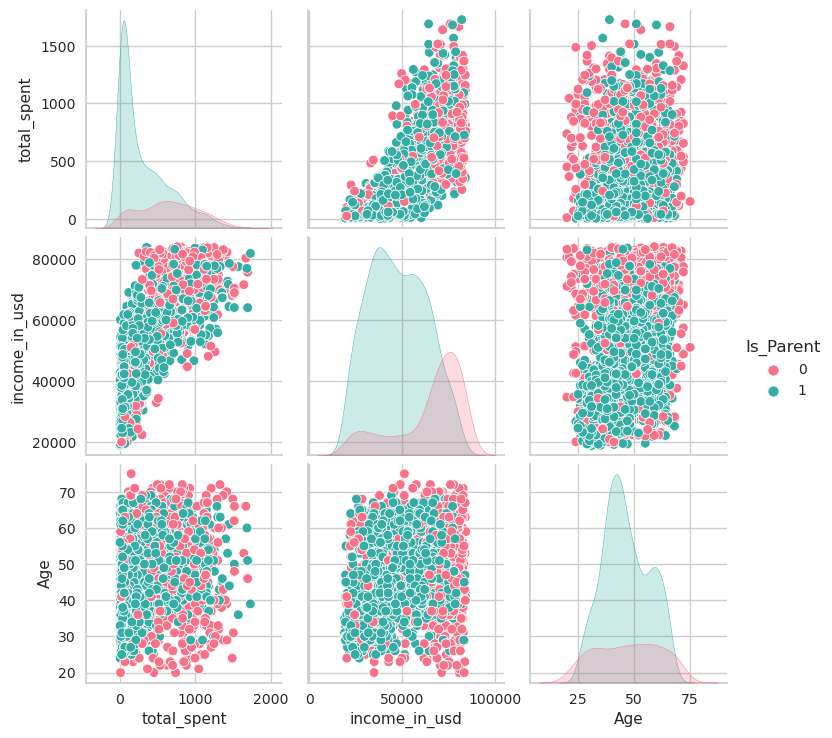

In [53]:
#plotting the pairplot
sns.pairplot(
    updated_df , 
    vars=['total_spent','income_in_usd','Age'] ,
    hue='Is_Parent', 
    palette='husl'
);

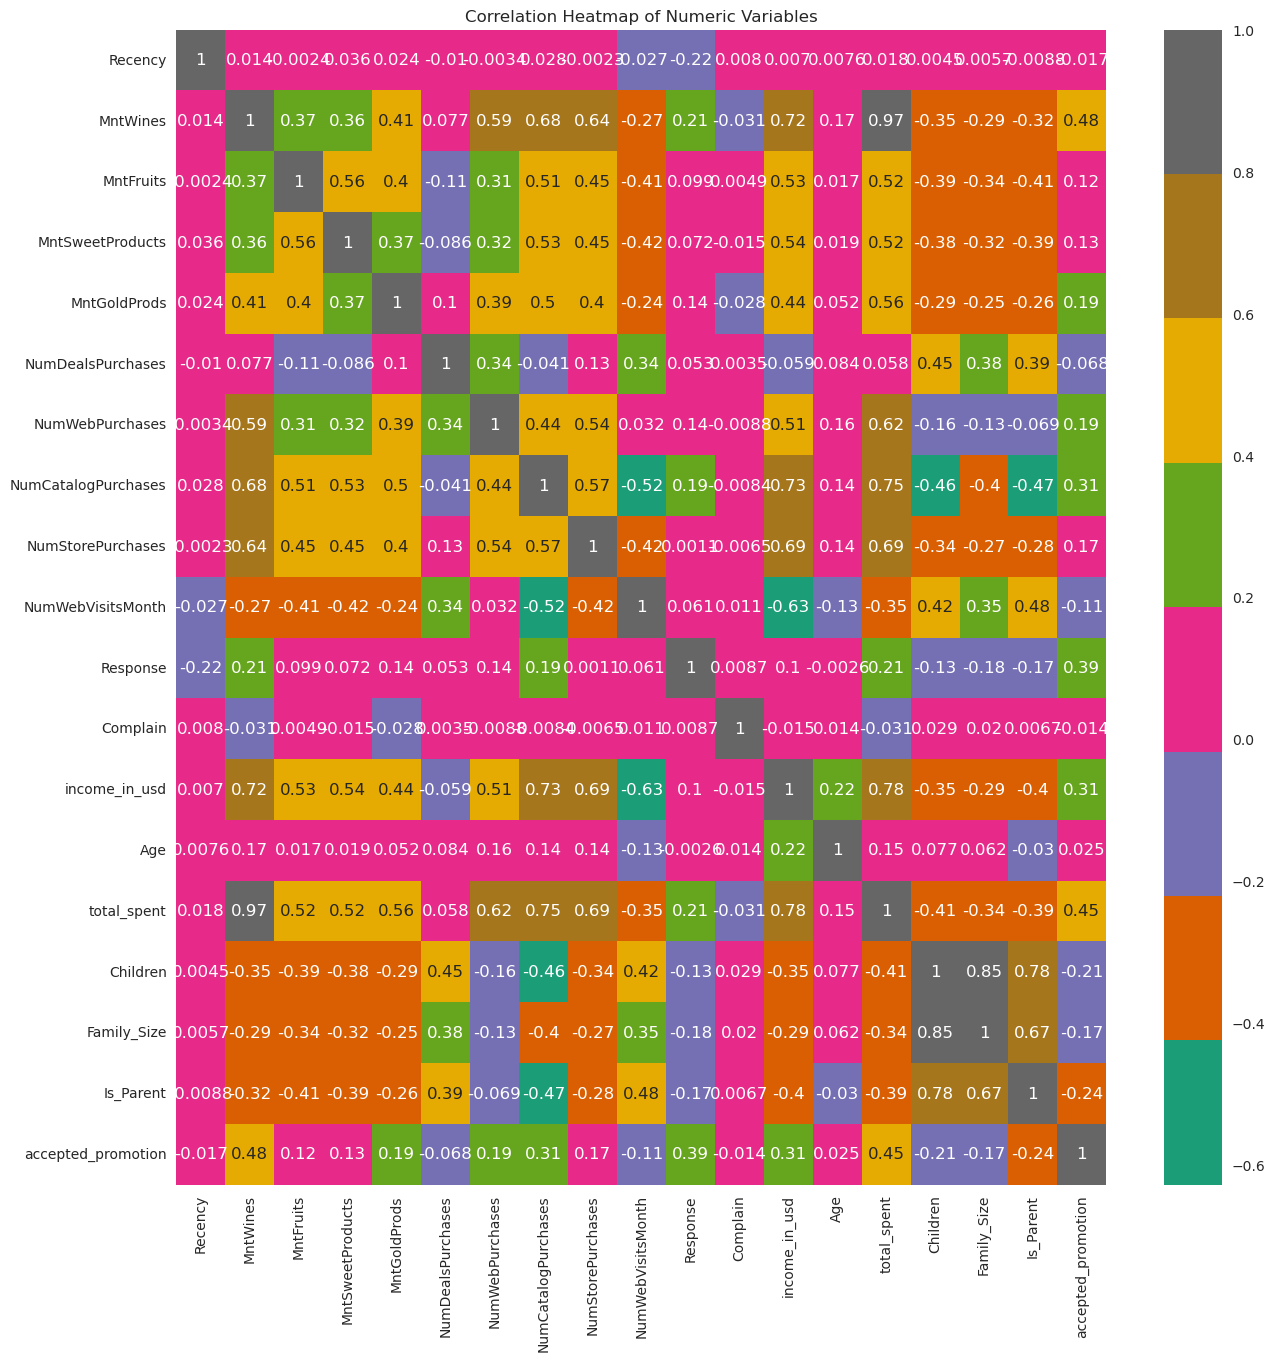

In [54]:
# Create the correlation heatmap using Seaborn
plt.figure(figsize=(15,15))
sns.heatmap(updated_df.corr(), annot=True, cmap='Dark2')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

**It seems like we have correlation among the feature. It increases the data redundancy and effect in further evauluation. So it is best for reducing the dimensionality**

<a name='Encoding Categorical Variables'></a>
<div style="border-radius:10px;
            background-color:green;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h2 style="padding: 5px 0px; color:white; font-weight: bold; font-family: Cursive">
8. Encoding Categorical Variables</h2></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [55]:
categorical_data =  [col for col in updated_df.columns if updated_df[col].dtype=='O']
categorical_data

['Education', 'Country', 'Living_With']

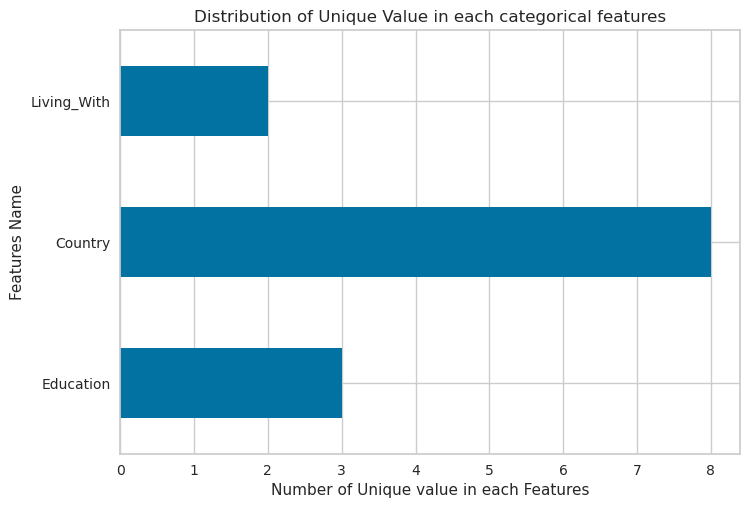

In [56]:
updated_df[categorical_data].nunique().plot(
        kind='barh',
        xlabel="Number of Unique value in each Features",
        ylabel="Features Name",
        title="Distribution of Unique Value in each categorical features"
);

**From above horizontal bar plot, we can see that there are `2` Unique value in `Living_With` column, `8` unique value in `Country` column and `3` unique value in `Education` column**

In [57]:
# Map categorical values to numerical values in 'Education' column
updated_df['Education'] = updated_df['Education'].map({'Undergraduate': 0, 'Graduate': 1, 'Postgraduate': 2})

# Map categorical values to numerical values in 'Living_With' column
updated_df['Living_With'] = updated_df['Living_With'].map({'Alone': 0, 'Partner': 1})

In [58]:
updated_df['Country'].value_counts().to_dict()

{'SP': 975,
 'SA': 305,
 'CA': 237,
 'AUS': 136,
 'IND': 130,
 'GER': 109,
 'US': 96,
 'ME': 3}

**Frequency Encoding - Encode the countries based on their frequency, where higher frequency countries get higher encoded values.** <br>
Countries with higher frequencies will have higher encoded values, and those with lower frequencies will have lower encoded values. This approach can help capture the relationship between countries and the total spent more accurately.

In [59]:
country_frequency = updated_df['Country'].value_counts().to_dict()
updated_df['Country'] = updated_df['Country'].map(country_frequency)

In [60]:
updated_df.head()

Education  Recency  MntWines  MntFruits  MntSweetProducts  MntGoldProds  \
1          1        0       464          5                 0            37   
2          1        0       134         11                 2            30   
3          1        0        10          0                 0             0   
4          1        0         6         16                 0            34   
5          2        0       336        130                32            43   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1                  1                7                    3                  7   
2                  1                3                    2                  5   
3                  1                1                    0                  2   
4                  2                3                    1                  2   
5                  1                4                    7                  5   

   NumWebVisitsMonth  Response  Complain  Country  income_in_usd  Age  \
1                  5         1         0      237        57091.0   54   
2                  2         0         0       96        67267.0   57   
3                  7         0         0      136        32474.0   48   
4                  7         1         0      975        21474.0   26   
5                  2         1         0      975        71691.0   57   

   total_spent  Living_With  Children  Family_Size  Is_Parent  \
1          506            0         0            1          0   
2          177            1         1            3          1   
3           10            1         2            4          1   
4           56            0         1            2          1   
5          541            0         0            1          0   

   accepted_promotion  
1                   1  
2                   0  
3                   0  
4                   1  
5                   0

<a name='Feature scaling and Dimensionality Reduction'></a>
<div style="border-radius:10px;
            background-color:green;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h2 style="padding: 5px 0px; color:white; font-weight: bold; font-family: Cursive">
9. Feature Scaling and Dimensionality Reduction</h2></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [61]:
old_df = updated_df.copy()

### Standard Scaling

In [62]:
ss = StandardScaler()
data = pd.DataFrame(ss.fit_transform(updated_df), columns = updated_df.columns)

In [63]:
data.head()

Education   Recency  MntWines  MntFruits  MntSweetProducts  MntGoldProds  \
0  -0.448852 -1.700523  0.507860  -0.530234         -0.657691     -0.139532   
1  -0.448852 -1.700523 -0.514270  -0.375133         -0.606700     -0.276239   
2  -0.448852 -1.700523 -0.898343  -0.659485         -0.657691     -0.862127   
3  -0.448852 -1.700523 -0.910732  -0.245882         -0.657691     -0.198121   
4   1.113499 -1.700523  0.111398   2.701040          0.158158     -0.022355   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0          -0.749126         1.084025             0.162801           0.347899   
1          -0.749126        -0.428444            -0.213228          -0.275283   
2          -0.749126        -1.184679            -0.965287          -1.210056   
3          -0.205375        -0.428444            -0.589258          -1.210056   
4          -0.749126        -0.050327             1.666920          -0.275283   

   NumWebVisitsMonth  Response  Complain   Country  income_in_usd       Age  \
0          -0.162920  2.524693 -0.095515 -0.879956       0.299843  0.645898   
1          -1.518239 -0.396088 -0.095515 -1.240873       0.872273  0.907934   
2           0.740627 -0.396088 -0.095515 -1.138485      -1.084936  0.121827   
3           0.740627  2.524693 -0.095515  1.009098      -1.703718 -1.799767   
4          -1.518239  2.524693 -0.095515  1.009098       1.121136  0.907934   

   total_spent  Living_With  Children  Family_Size  Is_Parent  \
0     0.288532    -1.365558 -1.342302    -1.838700  -1.719957   
1    -0.570440     0.732301  0.006776     0.395570   0.581410   
2    -1.006452     0.732301  1.355854     1.512705   0.581410   
3    -0.886353    -1.365558  0.006776    -0.721565   0.581410   
4     0.379911    -1.365558 -1.342302    -1.838700  -1.719957   

   accepted_promotion  
0            1.288226  
1           -0.427398  
2           -0.427398  
3            1.288226  
4           -0.427398

### **Dimensionality Reduction**
### **Principal component analysis(PCA)**
​
The principal components of a collection of points in a real coordinate space are a sequence of **p** unit vectors, where the **i-th** vector is the direction of a line that best fits the data while being orthogonal to the first **i-1** vectors. Here, a best-fitting line is defined as one that minimizes the average squared distance from the points to the line. These directions constitute an orthonormal basis in which different individual dimensions of the data are linearly uncorrelated. Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.
​
<center><img src="https://miro.medium.com/max/596/1*QinDfRawRskupf4mU5bYSA.png"></center>

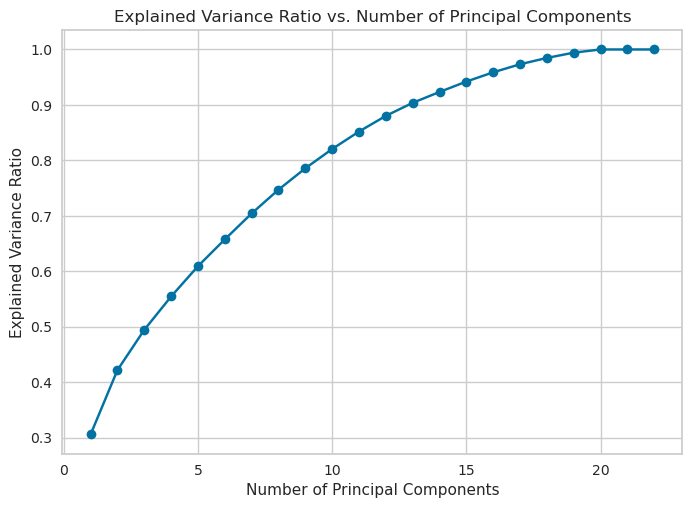

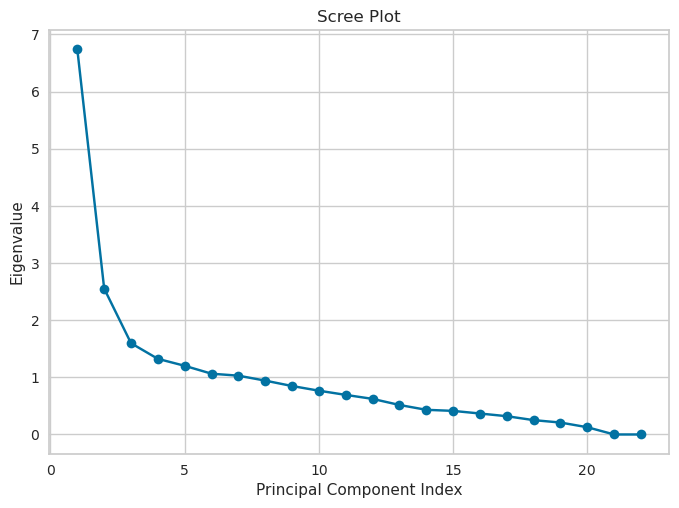

In [64]:
# Fit PCA to your data
pca = PCA()
pca.fit(data)

# Plot explained variance ratio
plt.plot(range(1, len(data.columns) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()

# Scree plot
plt.plot(range(1, len(data.columns) + 1), pca.explained_variance_, marker='o')
plt.xlabel('Principal Component Index')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

**The above second plot indicates that  the instant falling of plot at Principal component Index of 3 with Eigen value of 1.5 is better choice**

In [65]:
pca = PCA(n_components=3) #also more than 3 cluster is difficult for visualization

# Fit and transform your data
pca_result = pca.fit_transform(data)  # X is your data matrix

# The transformed data with 3 principal components
print(pca_result)

[[ 2.15835178 -1.52409028  3.47087126]
 [-0.54788839 -0.37486955 -1.03647949]
 [-3.49630643 -0.04324013 -0.25435839]
 ...
 [-2.8049115  -1.24349908 -0.90581971]
 [-1.27017962 -0.47380907  0.46169894]
 [ 3.06333439 -1.62261756 -2.32542662]]


In [66]:
# Get the indices of the original columns that contribute most to the top 3 principal components
top_pca_indices = pca.components_.argsort(axis=1)[:, -3:]  # Indices of top 3 components for each feature

# Get the corresponding column names for the top 3 principal components
top_pca_column_names = data.columns[top_pca_indices]

print("Top Principal Component Column Names:", top_pca_column_names)

Top Principal Component Column Names: [['NumCatalogPurchases' 'income_in_usd' 'total_spent']
 ['Children' 'Family_Size' 'NumDealsPurchases']
 ['NumWebVisitsMonth' 'accepted_promotion' 'Response']]


In [67]:
# Create a new DataFrame with transformed data
pca_df = pd.DataFrame(data=pca_result, columns=['PC1_mntwines', 'PC2_income', 'PC3_spent'])

# Display the new DataFrame
pca_df.head()

PC1_mntwines  PC2_income  PC3_spent
0      2.158352   -1.524090   3.470871
1     -0.547888   -0.374870  -1.036479
2     -3.496306   -0.043240  -0.254358
3     -1.833339   -1.462887   3.689209
4      3.511079   -2.253159   1.735582

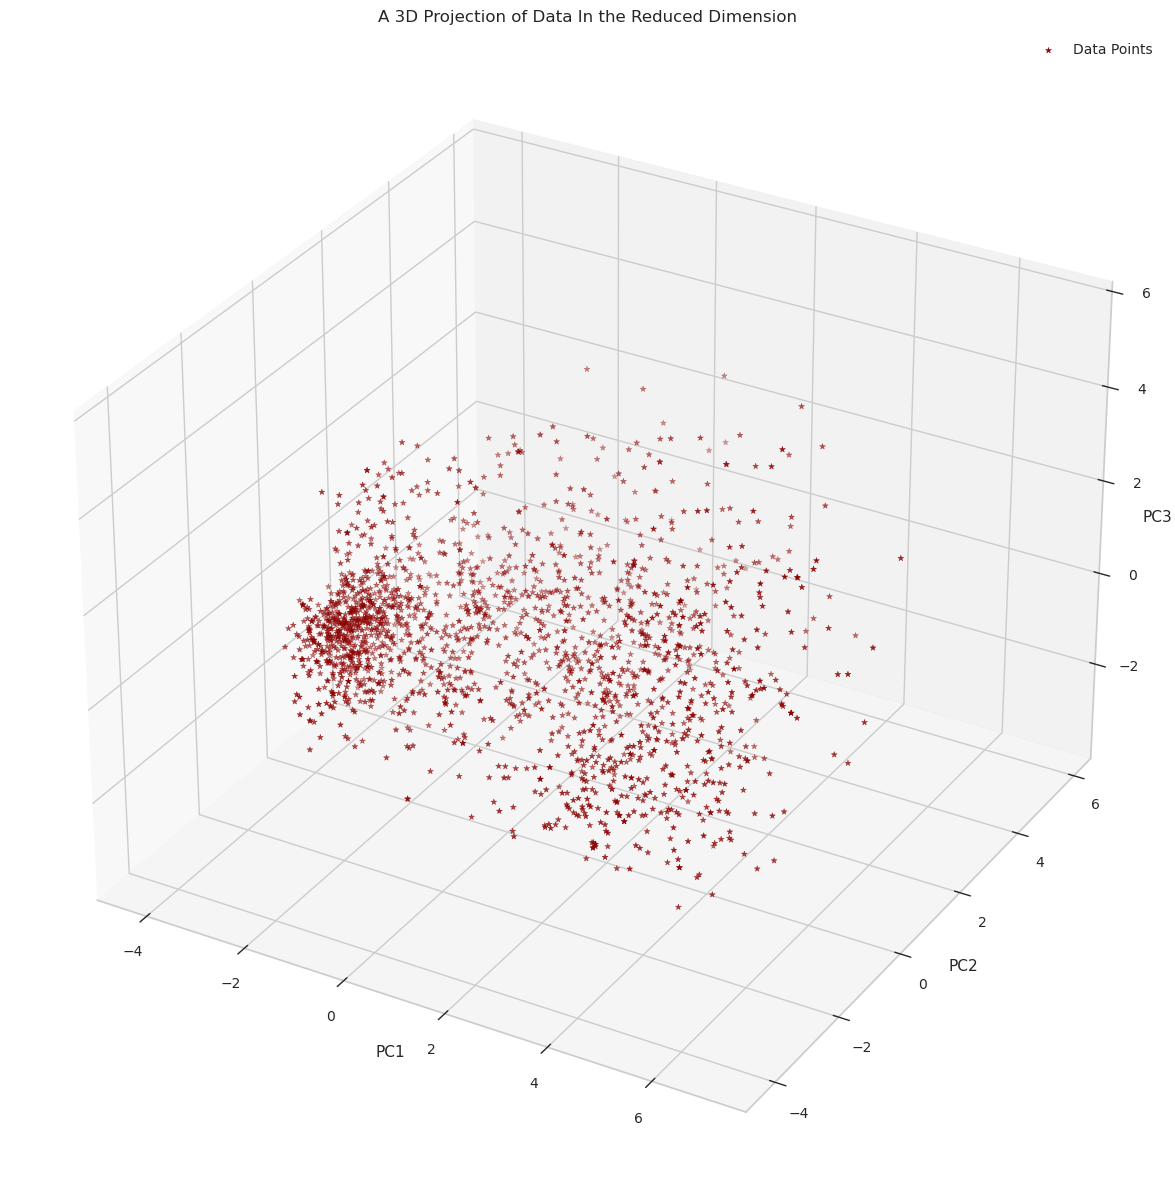

In [68]:
# Extract columns for plotting
x = pca_df['PC1_mntwines']
y = pca_df['PC2_income']
z = pca_df['PC3_spent']

# Create a 3D scatter plot
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='darkred', marker='*', label='Data Points')
ax.set_title('A 3D Projection of Data In the Reduced Dimension')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

<a name='Clustering Analysis'></a>
<div style="border-radius:10px;
            background-color:green;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h2 style="padding: 5px 0px; color:white; font-weight: bold; font-family: Cursive">
10. Clustering Analysis</h2></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

## **K-means Clustering**
### **Elbow method (clustering)**
​
In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use. 
​
<center><img src="https://miro.medium.com/max/1340/1*RnvrdhlUxHWss3vOffHT5g.png"></center>

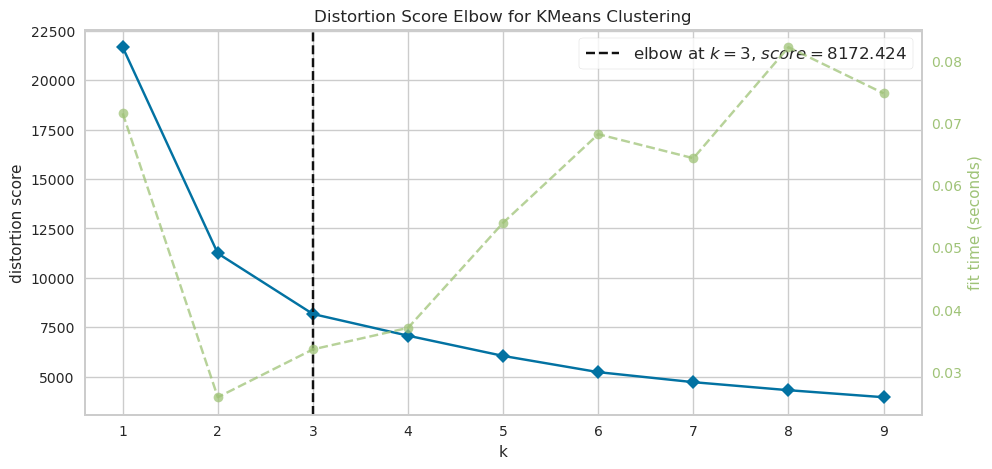

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [69]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10),size=(1080, 500))

visualizer.fit(pca_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

<div class="alert alert-block alert-info" style='color:black'>
<p><b>Using the elbow method We can observe that the optimal number of clusters is k=3. Now we can run a K-Means using as n_clusters the number 3.</b></p>
</div>

In [70]:
kmeans = KMeans(n_clusters = 3, init='k-means++',random_state=42)
kmeans.fit(pca_df)

# Now, print the silhouette score of this model

print("silhouette_score is :",silhouette_score(pca_df, kmeans.labels_, metric='euclidean'))

silhouette_score is : 0.4033339599157649


The Silhouette Score is a commonly used metric to evaluate the quality of clusters in a dataset. It measures how similar each data point is to its own cluster (cohesion) compared to other clusters (separation). The Silhouette Score ranges from -1 to 1, where a higher value indicates better-defined clusters

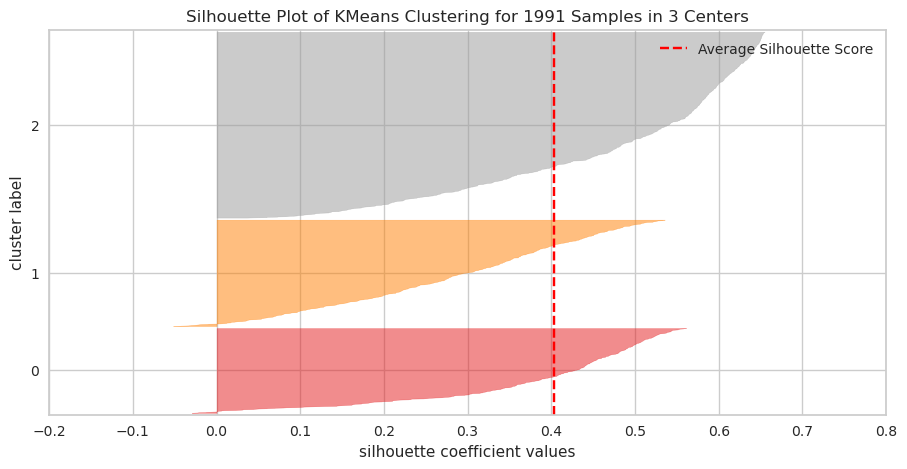

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1991 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [71]:
from yellowbrick.cluster import SilhouetteVisualizer 
visualizer = SilhouetteVisualizer(kmeans,size=(1080, 500))

visualizer.fit(pca_df)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

In [72]:
kmeans.labels_

array([0, 2, 2, ..., 2, 2, 0], dtype=int32)

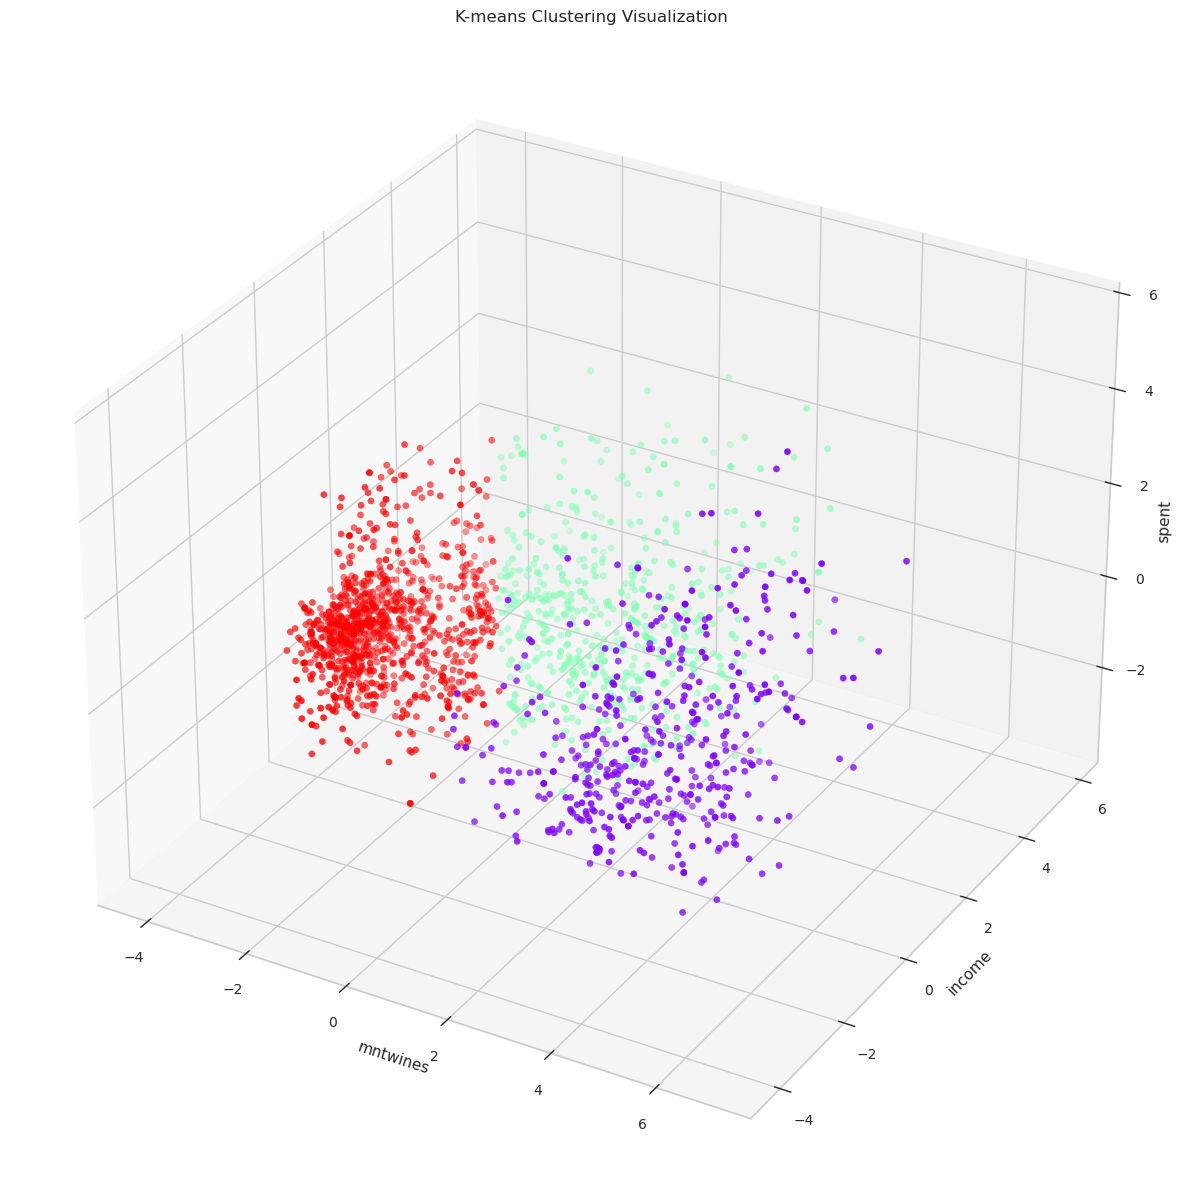

In [73]:
# Create a 3D scatter plot to visualize the clusters
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of data points with color-coded clusters
ax.scatter(pca_df['PC1_mntwines'], pca_df['PC2_income'], pca_df['PC3_spent'], c=kmeans.labels_, cmap='rainbow')
ax.set_xlabel('mntwines')
ax.set_ylabel('income')
ax.set_zlabel('spent')
ax.set_title('K-means Clustering Visualization')
plt.show()

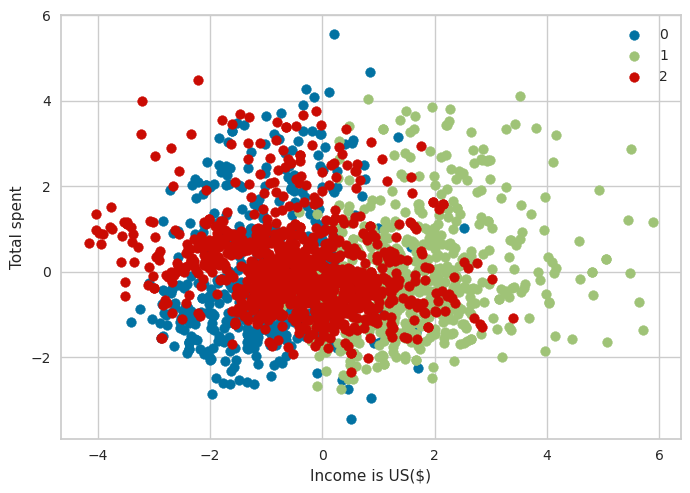

In [74]:
for label in np.unique(kmeans.labels_):
    X_ = pca_df[label == kmeans.labels_]
    plt.scatter(X_['PC2_income'], X_['PC3_spent'], label=label)
plt.legend()
plt.xlabel('Income is US($)')
plt.ylabel('Total spent')
plt.show()

### **Main Conclusion from Kmeans**
**Cluster 0 represents low Income and Low Spent**<br>
**Cluster 1 represents High Income and High Spent**<br>
**Cluster represent Medium level of Income and Medium Spent**

## **Agglomerative Hierarchical Clustering**

In [75]:
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
y_hat = AC.fit_predict(pca_df)
pca_df['Clusters'] = y_hat
#Adding the Clusters feature to the orignal dataframe.
data['Clusters'] = y_hat
old_df['Clusters'] = y_hat

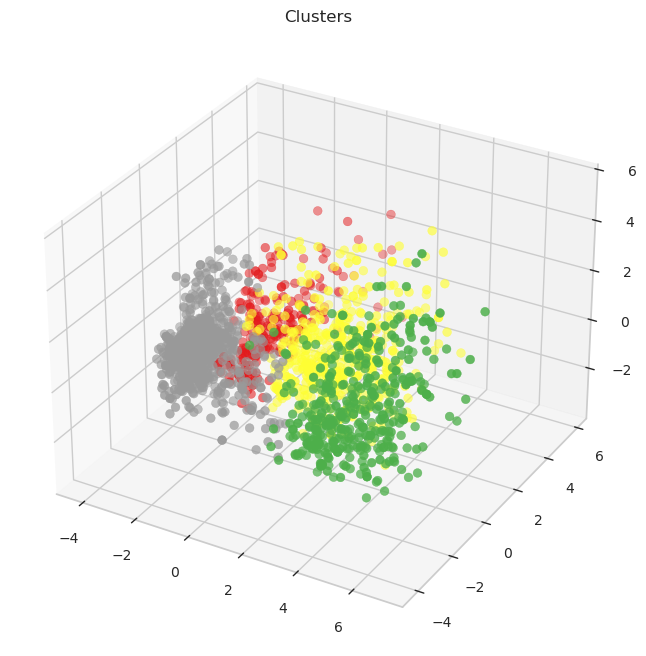

In [76]:
fig = plt.figure(figsize=(13,8))
ax = plt.subplot(111, projection='3d', label='bla')
ax.scatter(x, y, z, s=40, c=pca_df['Clusters'], marker='o', cmap='Set1_r')
ax.set_title('Clusters')
plt.show()

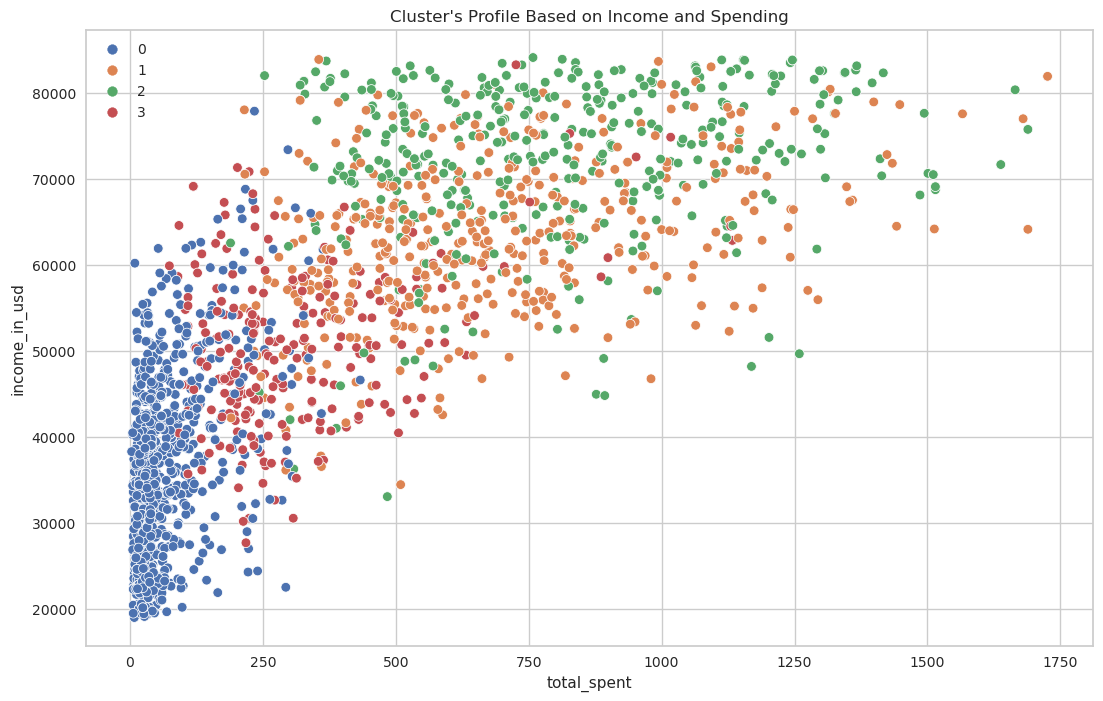

In [77]:
plt.figure(figsize=(13,8))
pl = sns.scatterplot(data=old_df, x=old_df['total_spent'], y=old_df['income_in_usd'], hue=old_df['Clusters'], palette= 'deep')
pl.set_title("Cluster's Profile Based on Income and Spending")
plt.legend()
plt.legend();

### **Main Conclusion from Agglomerative Hierarchical Clustering**
<br>**Cluster0 Low Income Low Spent**<br>**Cluster1 Mid-High Income Mid-High Spent**<br>**Cluster2 High income High Spent**<br>**Cluster3 Low-Mid Income Low-Mid Spent**

* ## **DBSCAN**

In [77]:
cluster = DBSCAN(eps=4, min_samples=4)
cluster.fit(data)
#reducing 1 clustering because its noise/outliers
print(len(set(cluster.labels_) - {1}))

2


**Finding the % of data marked as noise**

In [78]:
#-1 is noise
print(f'{100*(cluster.labels_==-1).sum()/len(cluster.labels_)}%')

3.2144650929181315%


**Visualize the clustered data using matplotlib.pyplot**

Text(0, 0.5, 'Income in $')

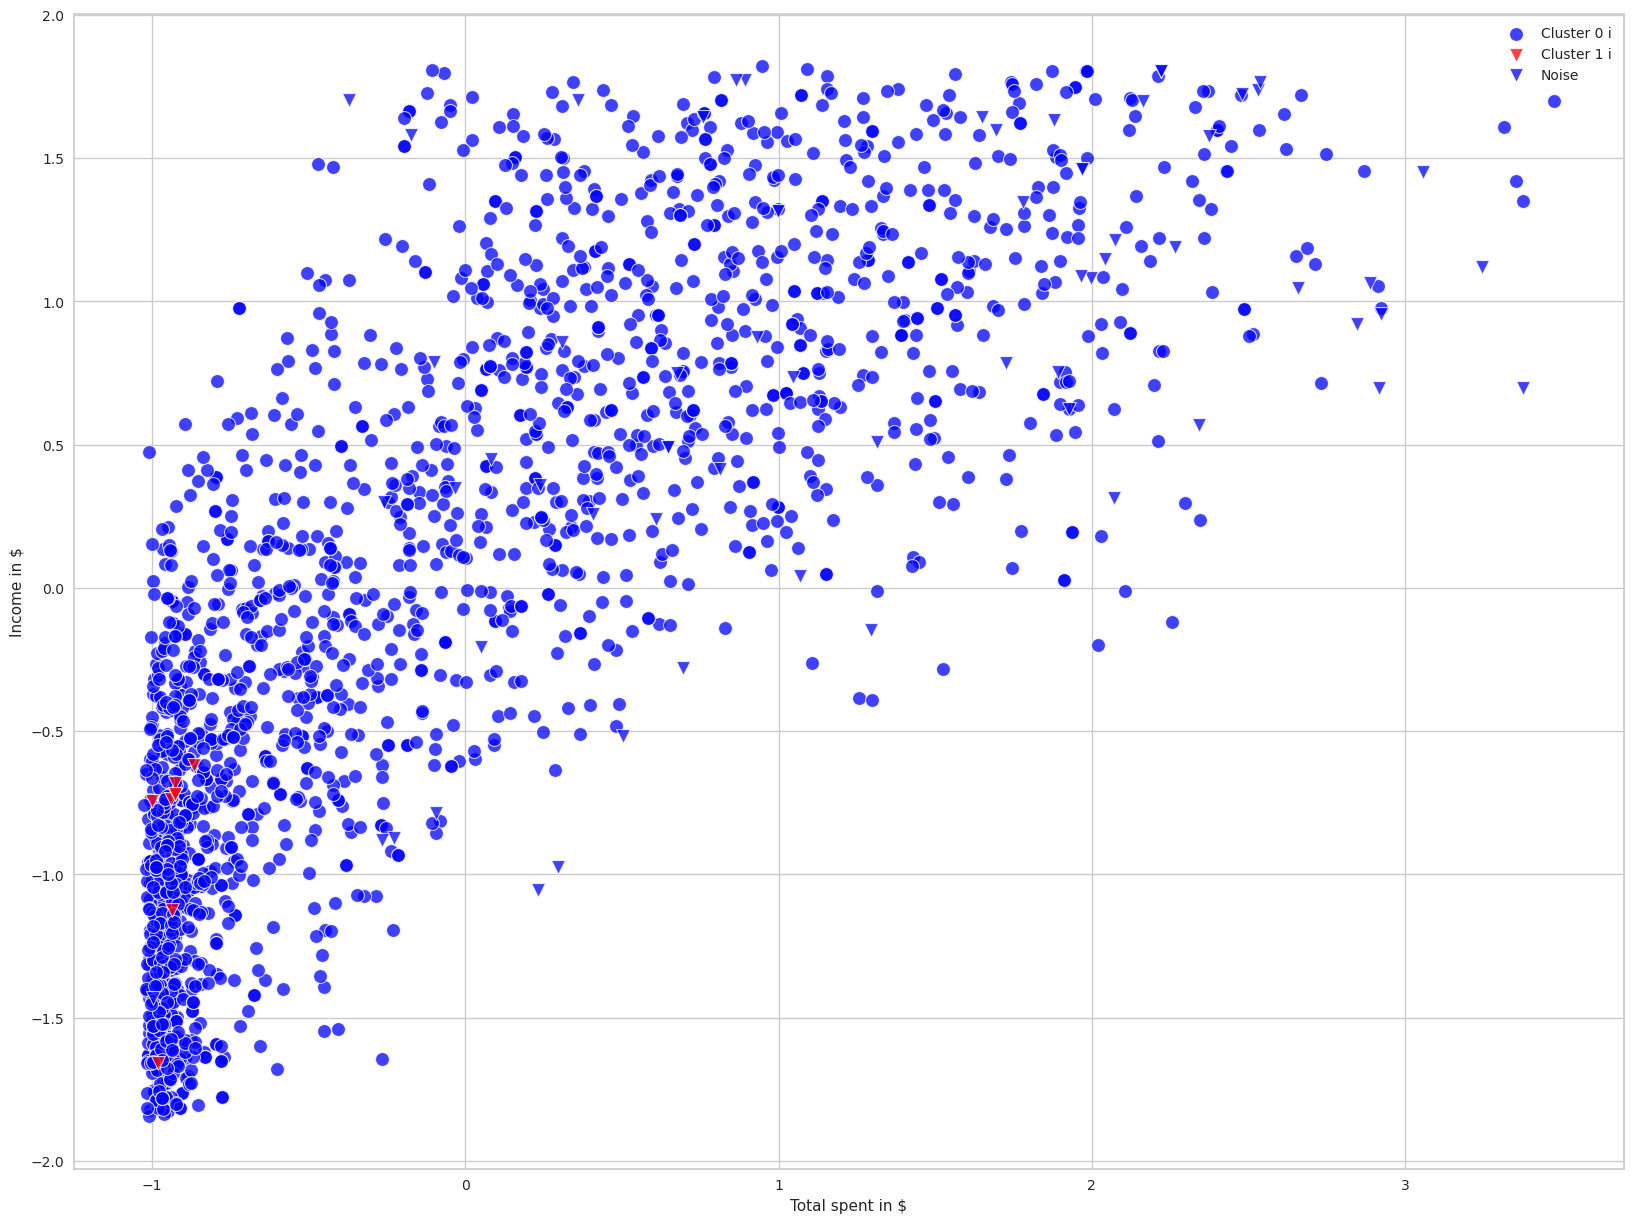

In [87]:
plt.rcParams['figure.figsize'] = (20,15)
unique_labels = set(cluster.labels_)
n_labels = len(unique_labels)
cmap = plt.cm.get_cmap('brg',n_labels)
for l in unique_labels:
    sns.scatterplot(
        x=data['total_spent'][cluster.labels_==l],
        y=data['income_in_usd'][cluster.labels_==l],
        c = [cmap(l)],
        marker = 'ov'[l%2],
        alpha = 0.75,
        s = 100,
        label = f'Cluster {l} i' if l>=0 else "Noise"
    )
plt.xlabel("Total spent in $")
plt.ylabel("Income in $")

### **Main Conclusion From DBSCAN**
**We can see only few cluster1 because it is overriden on top by cluster0. However, we can conclude that**<br> 
- **Cluster 1 represent Mid-High Income and Mid - High Spent**
- **Cluster 0 represents Low - Mid Income and Low Spent**

<div style="background-color:cyan; padding:10px">
<H1 style="margin:0; color:black; text-align:justify">The key findings and insights from the clustering analysis are as follows:</H1><br><br>
<ul style="margin:0; color:black;">
    <li>Among the countries, the top 3 customers with the highest spending are from Spain (48.4%), South Africa (15.9%), and Canada (12.1%).</li>
    <li>A linear relationship is observed between the 'Total Spent' and 'Income' columns, indicating that as income increases, the total spending also tends to increase.</li>
    <li>Education level plays a significant role in spending behavior, with postgraduate customers exhibiting the highest spending, followed by graduate and undergraduate customers.</li>
    <li>Most customers are highly qualified, indicating a potential link between higher education levels and higher spending habits.</li>
    <li>Utilizing Agglomerative Clustering based on this information yields four distinct clusters:
        <ul>
            <li><strong>Cluster 0:</strong> Low-Income, Low-Spending</li>
            <li><strong>Cluster 1:</strong> Mid-High Income, Mid-High Spending</li>
            <li><strong>Cluster 2:</strong> High Income, High Spending</li>
            <li><strong>Cluster 3:</strong> Low-Mid Income, Low-Mid Spending</li>
        </ul>
    </li>
</ul>
<p style="margin:0; color:black; text-align:justify">These findings provide valuable insights for refining marketing strategies, targeting high-value customer segments, and understanding the spending behavior of different income groups.</p>


<div style="background-color:cyan; padding:10px">
<H1 style="margin:0; color:black; text-align:justify">In the final evaluation of the clustering models, we draw the following conclusions:</H1><br><br>

<h3 style="margin:0; color:black;">Main Conclusion from K-Means Clustering:</h3>
<ul style="margin:0; color:black;">
    <li><strong>Cluster 0:</strong> Represents low income and low spending customers.</li>
    <li><strong>Cluster 1:</strong> Represents high income and high spending customers.</li>
    <li><strong>Cluster 2:</strong> Represents customers with a medium level of income and medium spending.</li>
</ul>
<br>
<h3 style="margin:0; color:black;">Main Conclusion from Agglomerative Hierarchical Clustering:</h3>
<ul style="margin:0; color:black;">
    <li><strong>Cluster 0:</strong> Represents low income and low spending customers.</li>
    <li><strong>Cluster 1:</strong> Represents mid-high income and mid-high spending customers.</li>
    <li><strong>Cluster 2:</strong> Represents high income and high spending customers.</li>
    <li><strong>Cluster 3:</strong> Represents low-mid income and low-mid spending customers.</li>
</ul>
<br>
<h3 style="margin:0; color:black;">Main Conclusion from DBSCAN Clustering:</h3>
<p style="margin:0; color:black; text-align:justify">Although only a few clusters are identified in the DBSCAN model due to cluster 0 overriding cluster 1, we can still deduce the following:</p>
<ul style="margin:0; color:black;">
    <li><strong>Cluster 1:</strong> Represents mid-high income and mid-high spending customers.</li>
    <li><strong>Cluster 0:</strong> Represents low-mid income and low spending customers.</li>
</ul>
<br>
<p style="margin:0; color:black; text-align:justify">Considering the results and insights from the three clustering models, <strong>Agglomerative Hierarchical Clustering</strong> appears to provide the most meaningful and distinct segmentation of customer groups based on income and spending behavior. Its well-defined clusters and logical distribution align well with the observed patterns, making it the recommended choice for this particular dataset and analysis.</p>
</div>

<div style="background-color:cyan; padding:10px; border: 2px solid black;">
<p style="margin:0; color:black; text-align:justify">While the clustering analysis has provided valuable insights, there are several potential flaws and steps that can be taken to gather more information:</p>

<h3 style="margin:0; color:black;">Possible Flaws in the Analysis:</h3>
<ul style="margin:0; color:black;">
    <li>The assumption of linear relationships between income and spending might not hold true for all segments, as there could be non-linear patterns that are not captured by the current analysis.</li>
    <li>The choice of clustering algorithms and their parameters can influence results. It's important to explore a variety of algorithms and tune their parameters for better performance.</li>
    <li>The features used for clustering might not be exhaustive. Incorporating additional relevant features, such as age or geographic location, could potentially lead to more accurate segmentation.</li>
</ul>

<h3 style="margin:0; color:black;">Steps to Enhance Information:</h3>
<ul style="margin:0; color:black;">
    <li><strong>Feature Engineering:</strong> Extract and create new features that might provide richer insights into customer behavior. For instance, a feature representing the ratio of spending to income could highlight spending habits relative to income.</li>
    <li><strong>Ensemble Clustering:</strong> Combine results from multiple clustering algorithms to create a more robust segmentation. This could mitigate the impact of biases introduced by any single algorithm.</li>
    <li><strong>Dimensionality Reduction:</strong> Apply dimensionality reduction techniques, such as PCA (Principal Component Analysis), to reduce noise and focus on the most informative features.</li>
    <li><strong>Domain Expertise:</strong> Consult domain experts to validate the findings and incorporate their insights into the analysis. Their input can help interpret results and guide further exploration.</li>
</ul>

<p style="margin:0; color:black; text-align:justify">By addressing these potential flaws and taking proactive steps to gather more information, we can refine the clustering analysis and uncover deeper insights into customer behavior and segmentation.</p>
</div>

<center>
    <h1> Thank You </h1>
<center>